In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("DATASET.csv")

In [4]:
df.shape

(10000, 12)

- **All the relevant columns are present**
====================================================================================================================================================
----------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

In [6]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DR_NO         10000 non-null  int64 
 1   Date Rptd     10000 non-null  object
 2   DATE OCC      10000 non-null  object
 3   TIME OCC      10000 non-null  int64 
 4   AREA NAME     10000 non-null  object
 5   Crm Cd Desc   10000 non-null  object
 6   Vict Age      10000 non-null  int64 
 7   Vict Sex      9151 non-null   object
 8   Vict Descent  9151 non-null   object
 9   Weapon Desc   2371 non-null   object
 10  Status Desc   10000 non-null  object
 11  LOCATION      10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 586.0+ KB


- **Converting to appropriate data types**
====================================================================================================================================================
----------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
# Convert 'Date Rptd' column to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DR_NO         10000 non-null  int64         
 1   Date Rptd     10000 non-null  datetime64[ns]
 2   DATE OCC      10000 non-null  datetime64[ns]
 3   TIME OCC      10000 non-null  int64         
 4   AREA NAME     10000 non-null  object        
 5   Crm Cd Desc   10000 non-null  object        
 6   Vict Age      10000 non-null  int64         
 7   Vict Sex      9151 non-null   object        
 8   Vict Descent  9151 non-null   object        
 9   Weapon Desc   2371 non-null   object        
 10  Status Desc   10000 non-null  object        
 11  LOCATION      10000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 664.1+ KB


- **Q1) Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.**
====================================================================================================================================================
----------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
Peak_Crime_Hour = df['TIME OCC'].value_counts().idxmax()
Peak_Crime_Hour

1800


1800 is the most repeated value in the Time column, therefore it is the time during which most of the crime is committed.
---
------------------------------------------------------------------------------------------------------------------------------------------------------



In [12]:
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M').dt.time

In [13]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,10304468,2020-01-08,2020-01-08,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,190101086,2020-01-02,2020-01-01,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,200110444,2020-04-14,2020-02-13,12:00:00,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST
3,191501505,2020-01-01,2020-01-01,17:30:00,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL
4,191921269,2020-01-01,2020-01-01,04:15:00,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST


- **Filtered DataFrame according to the time (Night).**
====================================================================================================================================================
----------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
from datetime import datetime, time

early_morning_crimes = df[(df['TIME OCC'] >= time(22, 0)) | (df['TIME OCC'] < time(4, 0))]
early_morning_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,10304468,2020-01-08,2020-01-08,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,190101086,2020-01-02,2020-01-01,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
5,200100501,2020-01-02,2020-01-01,00:30:00,Central,"RAPE, FORCIBLE",25,F,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
7,200100504,2020-01-04,2020-01-04,00:40:00,Central,OTHER MISCELLANEOUS CRIME,0,X,X,NaN,Invest Cont,200 E 6TH ST
8,200100507,2020-01-04,2020-01-04,02:00:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,M,B,NaN,Invest Cont,700 BERNARD ST
...,...,...,...,...,...,...,...,...,...,...,...,...
9961,201226783,2020-12-19,2020-12-18,22:00:00,77th Street,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,48,M,H,NaN,Invest Cont,7900 S SAN PEDRO ST
9970,200806304,2020-02-21,2020-02-20,22:00:00,West LA,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,50,M,W,NaN,Invest Cont,1700 S WOOSTER ST
9973,200517587,2020-12-07,2020-12-06,02:30:00,Harbor,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,46,F,W,NaN,Invest Cont,PACIFIC
9991,200516796,2020-11-15,2020-11-15,00:01:00,Harbor,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",57,F,W,NaN,Invest Cont,800 W 3RD ST


- **Q2) Selecting the top value for location which would give us the area with the largest frequency of night crimes**
====================================================================================================================================================
----------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
peak_night_crime_location = early_morning_crimes['LOCATION'].value_counts().idxmax()
peak_night_crime_location

'6TH'

- **Q3) Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.**
----------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
age_groups = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
victim_ages = pd.Series([0] * len(age_groups), index=age_groups)

for age in df['Vict Age']:
  if age < 18:
    victim_ages['0-17'] += 1
  elif age < 26:
    victim_ages['18-25'] += 1
  elif age < 35:
    victim_ages['26-34'] += 1
  elif age < 45:
    victim_ages['35-44'] += 1
  elif age < 55:
    victim_ages['45-54'] += 1
  elif age < 65:
    victim_ages['55-64'] += 1
  else:
    victim_ages['65+'] += 1

victim_ages


0-17     2089
18-25    1232
26-34    2004
35-44    1730
45-54    1276
55-64    1043
65+       626
dtype: int64

- **Visualizing through bar chart**
====================================================================================================================================================
----------------------------------------------------------------------------------------------------------------------------------------------------

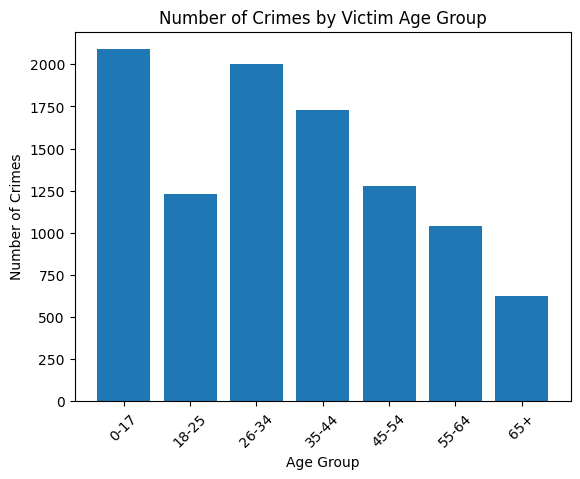

In [17]:
labels = victim_ages.index.to_list()
values = victim_ages.values.tolist()

plt.bar(labels, values)

plt.title("Number of Crimes by Victim Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")

plt.xticks(rotation=45)

plt.show()


====================================================================================================================================================
----------------------------------------------------------------------------------------------------------------------------------------------------